# Linear Regression


In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

## 3. Nonlinear

$$f(x) = \sin(3.2x) + 0.8x$$


### 3. 生成假資料

In [4]:
x = np.linspace(0, 5, 100)
y = np.sin(3.2*x) + 0.8*x + 0.3*np.random.randn(100)

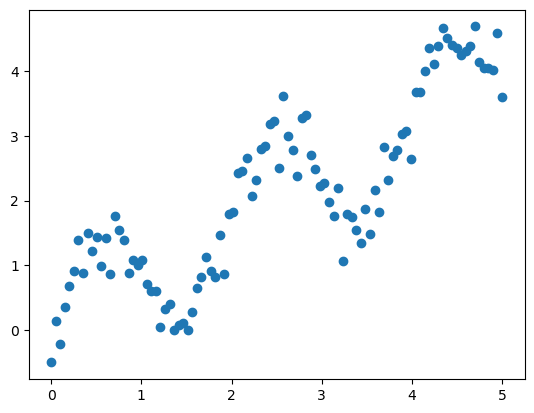

In [5]:
plt.scatter(x,y)

#### nonlinear

In [6]:
regr_lin = LinearRegression()

In [7]:
X = x.reshape(-1, 1)
print(X.shape)

(100, 1)


In [8]:
regr_lin.fit(X,y)

LinearRegression()

0.5546319691226899


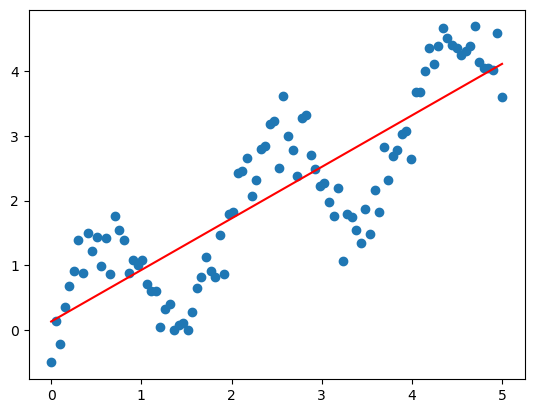

In [9]:
Y=regr_lin.predict(X)
plt.scatter(x,y)
plt.plot(x,Y , color='r')
mse = np.sum((Y-y)**2) / len(y)
print(mse)

果然超級不準, 該如何是好?

#### 多項式

多項式5次方

$$\widehat{y}=xw+b=w_{1}x_{1}+w_{2}x_{1}^{2}+w_{3}x_{1}^{3}+w_{4}x_{1}^{4}+w_{5}x_{1}^{5}+b$$

In [10]:
print(x.shape)

(100,)


In [11]:
X_poly = np.array([[k, k**2, k**3, k**4, k**5] for k in x])  # add k**6 to try it
print(X_poly.shape)

(100, 5)


In [12]:
regr_poly = LinearRegression()

In [13]:
regr_poly.fit(X_poly, y)

LinearRegression()

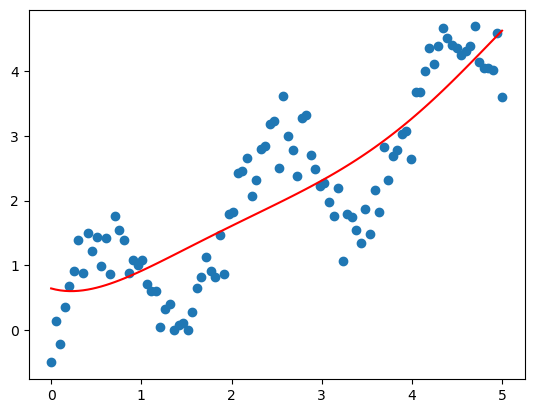

In [14]:
plt.scatter(x,y)
plt.plot(x, regr_poly.predict(X_poly), 'r')

In [15]:
print('Coefficients: ', regr_poly.coef_)
print('interception: ', regr_poly.intercept_)

Coefficients:  [-0.3987045   1.04432716 -0.46032976  0.09206178 -0.00644232]
interception:  0.6423404657860345


In [16]:
W=regr_poly.coef_
b=regr_poly.intercept_
np.dot(X_poly,W.T)+b

array([0.64234047, 0.624809  , 0.61225769, 0.60435198, 0.60077116,
       0.60120815, 0.60536921, 0.61297372, 0.62375391, 0.63745461,
       0.65383299, 0.6726583 , 0.69371164, 0.71678569, 0.74168445,
       0.76822298, 0.7962272 , 0.82553356, 0.85598883, 0.88744983,
       0.91978321, 0.95286514, 0.9865811 , 1.0208256 , 1.05550195,
       1.09052198, 1.12580581, 1.16128159, 1.19688521, 1.23256011,
       1.26825697, 1.3039335 , 1.33955415, 1.37508988, 1.41051788,
       1.44582134, 1.48098921, 1.51601589, 1.55090102, 1.58564925,
       1.6202699 , 1.65477679, 1.68918794, 1.72352536, 1.75781472,
       1.79208518, 1.82636908, 1.86070171, 1.89512104, 1.92966749,
       1.96438366, 1.99931406, 2.0345049 , 2.0700038 , 2.10585953,
       2.14212179, 2.17884094, 2.21606773, 2.25385306, 2.29224775,
       2.33130222, 2.37106632, 2.411589  , 2.45291812, 2.49510013,
       2.53817988, 2.58220032, 2.62720229, 2.6732242 , 2.72030185,
       2.76846811, 2.81775273, 2.86818203, 2.91977868, 2.97256

In [17]:
regr_poly.predict(X_poly)

array([0.64234047, 0.624809  , 0.61225769, 0.60435198, 0.60077116,
       0.60120815, 0.60536921, 0.61297372, 0.62375391, 0.63745461,
       0.65383299, 0.6726583 , 0.69371164, 0.71678569, 0.74168445,
       0.76822298, 0.7962272 , 0.82553356, 0.85598883, 0.88744983,
       0.91978321, 0.95286514, 0.9865811 , 1.0208256 , 1.05550195,
       1.09052198, 1.12580581, 1.16128159, 1.19688521, 1.23256011,
       1.26825697, 1.3039335 , 1.33955415, 1.37508988, 1.41051788,
       1.44582134, 1.48098921, 1.51601589, 1.55090102, 1.58564925,
       1.6202699 , 1.65477679, 1.68918794, 1.72352536, 1.75781472,
       1.79208518, 1.82636908, 1.86070171, 1.89512104, 1.92966749,
       1.96438366, 1.99931406, 2.0345049 , 2.0700038 , 2.10585953,
       2.14212179, 2.17884094, 2.21606773, 2.25385306, 2.29224775,
       2.33130222, 2.37106632, 2.411589  , 2.45291812, 2.49510013,
       2.53817988, 2.58220032, 2.62720229, 2.6732242 , 2.72030185,
       2.76846811, 2.81775273, 2.86818203, 2.91977868, 2.97256

#### RBF

$$\phi_i = e^{-\| x - c_i \|^2/2\sigma^2}$$

In [18]:
# normal distrubution
def RBF(x, center, sigma):
    k = np.exp(-(x - center)**2/(2*sigma**2))
    return k

In [19]:
sigma = 0.3

In [20]:
X_rbf = np.array([[RBF(k, .5, sigma), 
                  RBF(k, 1.5, sigma),
                  RBF(k, 2.5, sigma),
                  RBF(k, 3.5, sigma),
                  RBF(k, 4.5, sigma)] for k in x])



In [21]:
regr_rbf = LinearRegression()

In [22]:
regr_rbf.fit(X_rbf, y)

LinearRegression()

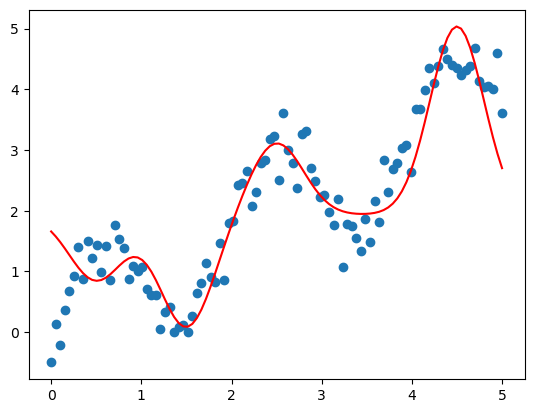

In [23]:
plt.scatter(x,y)
plt.plot(x, regr_rbf.predict(X_rbf), 'r')

In [24]:
print('Coefficients: ', regr_rbf.coef_)
print('interception: ', regr_rbf.intercept_)

Coefficients:  [-1.07338388 -1.84134621  1.19050047  0.00680486  3.11054819]
interception:  1.9252392958729403


#### Comparison

In [25]:
Y_lin = regr_lin.predict(X)
Y_poly = regr_poly.predict(X_poly)
Y_rbf = regr_rbf.predict(X_rbf)

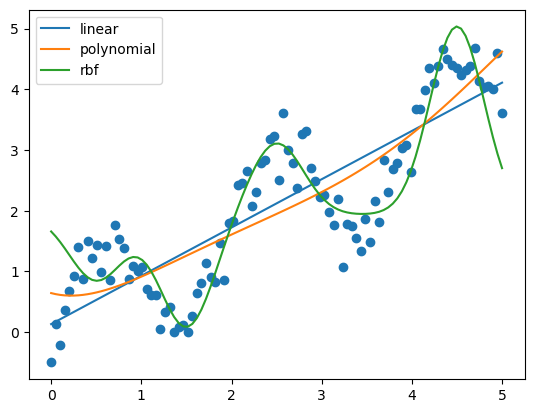

In [26]:
plt.scatter(x,y)

plt.plot(x, Y_lin, label='linear')
plt.plot(x, Y_poly, label='polynomial')
plt.plot(x, Y_rbf, label='rbf')
plt.legend()

## 請計算模型的MSE

In [27]:
print(np.sum((regr_lin.predict(X)-y)**2) / len(y))

0.5546319691226899


In [28]:
print(np.sum((regr_poly.predict(X_poly)-y)**2) / len(y))

0.5153250162637739


In [29]:
print(np.sum((regr_rbf.predict(X_rbf)-y)**2) / len(y))

0.30196611199610407
